In [1]:
import numpy as np 

import pandas as pd

In [2]:
dataset = pd.read_csv('churn-bigml-20.csv')

In [3]:
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
dataset.columns 

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
dataset['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [6]:
print(dataset.groupby('Churn')['Customer service calls'].mean())

Churn
False    1.437063
True     2.326316
Name: Customer service calls, dtype: float64


In [7]:
print(dataset.groupby('State')['Churn'].value_counts())

State  Churn
AK     False     9
AL     False    13
       True      1
AR     False     8
AZ     False    18
                ..
WI     True      3
WV     False    15
       True      3
WY     False    10
       True      1
Name: Churn, Length: 93, dtype: int64


In [8]:
!pip install seaborn

In [9]:
# Import matplotlib and seaborn 

import matplotlib.pyplot as plt 

import seaborn as sns

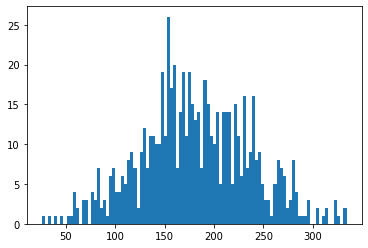

In [10]:
# Visualize the distribution of 'Total day minutes' 

plt.hist(dataset['Total day minutes'], bins = 100) 

  
# Display the plot 
plt.show()

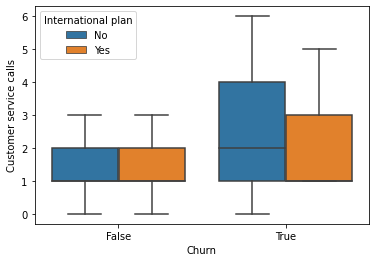

In [11]:
# Create the box plot 

sns.boxplot(x = 'Churn', 

            y = 'Customer service calls', 

            data = dataset, 

            sym = "",                   

            hue = "International plan")  
# Display the plot 
plt.show()

In [12]:
# Features and Labels 

X = dataset.iloc[:, 0:19].values 

y = dataset.iloc[:, 19].values # Churn 

  
# Encoding categorical data in X 

from sklearn.preprocessing import LabelEncoder 

  

labelencoder_X_1 = LabelEncoder() 

X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3]) 

  

labelencoder_X_2 = LabelEncoder() 

X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4]) 

  
# Encoding categorical data in y 

labelencoder_y = LabelEncoder() 

y = labelencoder_y.fit_transform(y) 

In [13]:
# Removing extra column to avoid dummy variable trap 

X_State = pd.get_dummies(X[:, 0], drop_first = True) 

  
# Converting X to a dataframe 

X = pd.DataFrame(X) 

  
# Dropping the 'State' column 

X = X.drop([0], axis = 1) 

  
# Merging two dataframes 

frames = [X_State, X] 

result = pd.concat(frames, axis = 1, ignore_index = True) 

  
# Final dataset with all numeric features 

X = result 

In [14]:
# Splitting the dataset into the Training and Test sets 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,  

                                                    test_size = 0.2,  

                                                    random_state = 0) 
 

In [15]:

# Feature Scaling 

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 

X_test = sc.transform(X_test) 

In [16]:
# Import RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier 

  
# Instantiate the classifier 

clf = RandomForestClassifier() 

  
# Fit to the training data 
clf.fit(X_train, y_train) 
 

RandomForestClassifier()

In [17]:
# Predict the labels for the test set 

y_pred = clf.predict(X_test) 

In [18]:

# Compute accuracy 

from sklearn.metrics import accuracy_score 

  
accuracy_score(y_test, y_pred) 

0.9104477611940298

In [19]:


from sklearn.metrics import confusion_matrix 

print(confusion_matrix(y_test, y_pred)) 

[[117   0]
 [ 12   5]]


In [20]:
m = confusion_matrix(y_test, y_pred)
print(m)

[[117   0]
 [ 12   5]]


In [21]:
TP = m[0,0]
TN = m[0,1]
FP = m[1,0]
FN = m[1,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP+TN)/(TP+TN+FP+FN)

In [22]:
print('Precision = ',Precision)
print('Recall = ',Recall)
print('Accuracy = ',Accuracy)

Precision =  0.9069767441860465
Recall =  0.9590163934426229
Accuracy =  0.8731343283582089
